# Visualization of the Interpolators

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WoodOxen/tactics2d/blob/master/docs/tutorial/interpolator_demo.ipynb)

This notebook demonstrates the utility of motion planning interpolators by visualizing the interpolation of a set of waypoints. The interpolators are used to generate smooth paths between the waypoints. The visualization is done using the `tactics2d` library.

In [ ]:
# If you are using colab, install the released version.
%%capture
!pip install tactics2d

In [1]:
# If you are running this notebook locally, use this block.
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../'))

In [ ]:
import tactics2d

print(tactics2d.__version__)

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import rotate
from shapely.geometry import Polygon

from tactics2d.interpolator import *

In [7]:
def get_bbox(center, length, width, heading):
    polygon = Polygon(
        np.array(
            [
                (length / 2, width / 2),
                (-length / 2, width / 2),
                (-length / 2, -width / 2),
                (length / 2, -width / 2),
            ]
        )
        + center
    )
    polygon = rotate(polygon, heading, origin="center", use_radians=True)

    return list(polygon.exterior.coords)

## Visualization of Dubins Interpolator

In [8]:
def visualize_dubins():
    start_headings = np.arange(0.1, 2 * np.pi, 0.66)
    start_points = np.vstack((np.cos(start_headings), np.sin(start_headings))).T * 15 + np.array(
        [7.5, 7.5]
    )
    end_point = np.array([7.5, 7.5])
    end_heading = np.pi / 2
    length = 4
    width = 1.8
    radius = 7.5

    my_dubins = Dubins(radius)

    fig, ax = plt.subplots(1, 1)

    ax.add_patch(
        mpatches.Polygon(
            get_bbox(end_point, length, width, end_heading), fill=True, color="gray", alpha=0.5
        )
    )

    for start_point, start_heading in zip(start_points, start_headings):
        ax.add_patch(
            mpatches.Polygon(
                get_bbox(start_point, length, width, start_heading),
                fill=True,
                color="pink",
                alpha=0.5,
            )
        )
        path = my_dubins.get_curve(start_point, start_heading, end_point, end_heading)
        curve = path.curve
        ax.plot(curve[:, 0], curve[:, 1], "black")

    ax.set_aspect("equal")
    plt.show()

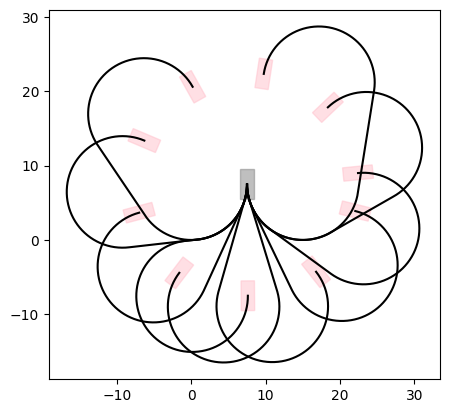

In [9]:
visualize_dubins()

## Visualization of Reeds-Shepp Interpolator

In [10]:
def visualize_RS():
    start_headings = np.arange(0.1, 2 * np.pi, 0.66)
    # start_headings = [0.1 + 0.66 * 1]
    start_points = np.vstack((np.cos(start_headings), np.sin(start_headings))).T * 15 + np.array(
        [7.5, 7.5]
    )
    end_point = np.array([7.5, 7.5])
    end_heading = np.pi / 2
    length = 4
    width = 1.8
    radius = 7.5

    my_RS = ReedsShepp(radius)

    fig, ax = plt.subplots(1, 1)

    ax.add_patch(
        mpatches.Polygon(
            get_bbox(end_point, length, width, end_heading), fill=True, color="gray", alpha=0.5
        )
    )

    for start_point, start_heading in zip(start_points, start_headings):
        ax.add_patch(
            mpatches.Polygon(
                get_bbox(start_point, length, width, start_heading),
                fill=True,
                color="pink",
                alpha=0.5,
            )
        )
        path = my_RS.get_curve(start_point, start_heading, end_point, end_heading)
        curve = path.curve
        # paths = my_RS.get_all_path(start_point, start_heading, end_point, end_heading)
        # for path in paths:
        #     if path is not None:
        #         curve = my_RS.get_curve_line(path, start_point, start_heading)
        #         ax.plot(curve[:, 0], curve[:, 1])
        #         print(path.actions, path.segments * radius, path.signs, path.length)
        ax.plot(curve[:, 0], curve[:, 1], "black")

    ax.set_aspect("equal")
    plt.show()

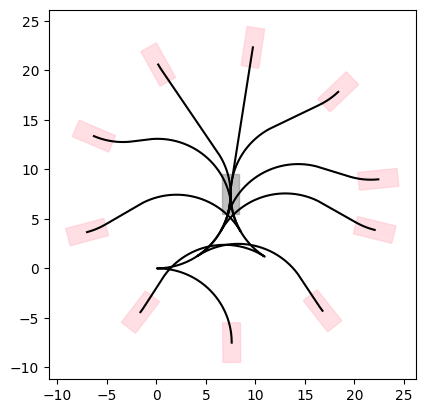

In [11]:
visualize_RS()